## 0. Chargement des donn√©es

In [28]:
import pandas as pd

# Charger les donn√©es
synthetic_pricing_data_path = "synthetic_pricing_data_calibrated.csv"
df_synthetic_pricing_data = pd.read_csv(synthetic_pricing_data_path)

# Afficher les premi√®res lignes des donn√©es
df_synthetic_pricing_data.head()

index  order_requests  city_x  date  language  mobile  avatar_id  hotel_id  \
0      0               1       8    21       6.0       0          1       161   
1      1               1       8    21       6.0       0          1       187   
2      2               1       8    21       6.0       0          1       279   
3      3               1       8    21       6.0       0          1       395   
4      4               1       8    21       6.0       0          1       488   

   stock  group  brand  parking  pool  children_policy       price  
0     46      2      1        1     0                0  204.835708  
1     32      1      2        1     1                0  223.086785  
2     12      0      0        1     0                0  292.384427  
3     10      1      3        0     0                0  326.151493  
4     42      1      3        1     1                1  218.292331

### Restreindre la variable price √† deux chiffres apr√®s la virgule

In [29]:
df_synthetic_pricing_data["price"] = df_synthetic_pricing_data["price"].round(2)

In [30]:
df_synthetic_pricing_data.shape

(6644, 15)

In [31]:
df_synthetic_pricing_data.isnull().sum()

index                0
order_requests       0
city_x               0
date                 0
language           134
mobile               0
avatar_id            0
hotel_id             0
stock                0
group                0
brand                0
parking              0
pool                 0
children_policy      0
price                0
dtype: int64

In [32]:
df_synthetic_pricing_data[df_synthetic_pricing_data['language'].isnull()]

index  order_requests  city_x  date  language  mobile  avatar_id  \
117     117              13       2     1       NaN       1          5   
118     118              13       2     1       NaN       1          5   
119     119              13       2     1       NaN       1          5   
120     120              13       2     1       NaN       1          5   
121     121              13       2     1       NaN       1          5   
...     ...             ...     ...   ...       ...     ...        ...   
6025   6025             767       5    21       NaN       1        751   
6258   6258             798       5     6       NaN       0        379   
6259   6259             798       5     6       NaN       0        379   
6260   6260             798       5     6       NaN       0        379   
6261   6261             798       5     6       NaN       0        379   

      hotel_id  stock  group  brand  parking  pool  children_policy   price  
117        131      1      1      3        1     1                0  361.57  
118        258      1      1      3        0     0                1  397.14  
119        265      6      1      3        0     1                0  377.60  
120        370      4      3      3        0     0                0  349.55  
121        418      0      2      1        1     0                0  334.53  
...        ...    ...    ...    ...      ...   ...              ...     ...  
6025       899     21      1      2        0     0                0  155.83  
6258       459      6      3      2        0     0                0  239.83  
6259       470      5      0      0        0     0                0  283.43  
6260       653      6      1      1        1     0                0  390.82  
6261       799      0      3      3        1     0                0  418.66  

[134 rows x 15 columns]

In [33]:
df_synthetic_pricing_data.head()

index  order_requests  city_x  date  language  mobile  avatar_id  hotel_id  \
0      0               1       8    21       6.0       0          1       161   
1      1               1       8    21       6.0       0          1       187   
2      2               1       8    21       6.0       0          1       279   
3      3               1       8    21       6.0       0          1       395   
4      4               1       8    21       6.0       0          1       488   

   stock  group  brand  parking  pool  children_policy   price  
0     46      2      1        1     0                0  204.84  
1     32      1      2        1     1                0  223.09  
2     12      0      0        1     0                0  292.38  
3     10      1      3        0     0                0  326.15  
4     42      1      3        1     1                1  218.29

In [34]:
df_synthetic_pricing_data['language'].fillna(1, inplace=True)

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\4051408567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_synthetic_pricing_data['language'].fillna(1, inplace=True)


In [35]:
df_synthetic_pricing_data.isnull().sum()

index              0
order_requests     0
city_x             0
date               0
language           0
mobile             0
avatar_id          0
hotel_id           0
stock              0
group              0
brand              0
parking            0
pool               0
children_policy    0
price              0
dtype: int64

In [36]:
df_synthetic = df_synthetic_pricing_data.drop(columns=["index", "hotel_id", "avatar_id"])  # Supprimer les identifiants inutiles

In [37]:
df_synthetic.head()

order_requests  city_x  date  language  mobile  stock  group  brand  \
0               1       8    21       6.0       0     46      2      1   
1               1       8    21       6.0       0     32      1      2   
2               1       8    21       6.0       0     12      0      0   
3               1       8    21       6.0       0     10      1      3   
4               1       8    21       6.0       0     42      1      3   

   parking  pool  children_policy   price  
0        1     0                0  204.84  
1        1     1                0  223.09  
2        1     0                0  292.38  
3        0     0                0  326.15  
4        1     1                1  218.29

R√©sultats des tests ANOVA :
                 F-statistic        p-value
pool              824.925752  4.160422e-171
brand             264.450145  3.916394e-162
group             203.704301  2.143720e-126
parking           118.141505   2.737374e-27
city_x             18.084856   5.149848e-27
mobile             85.694628   2.779529e-20
children_policy    39.502847   8.818162e-18
language            5.822400   8.626491e-09


C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


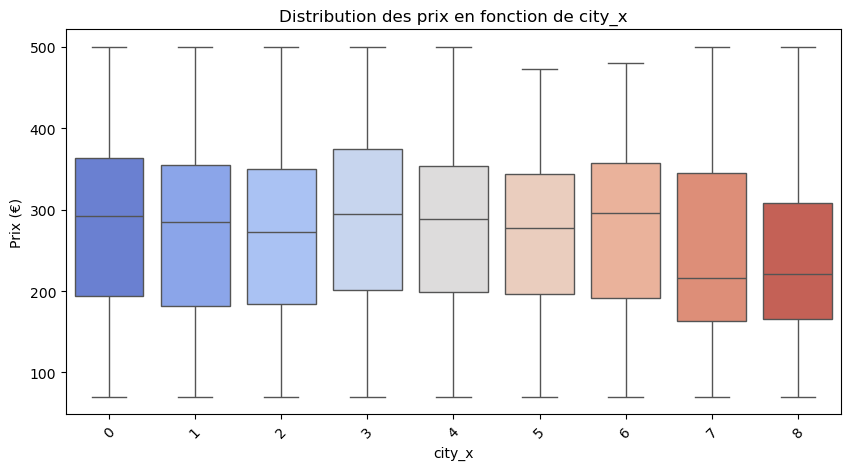

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


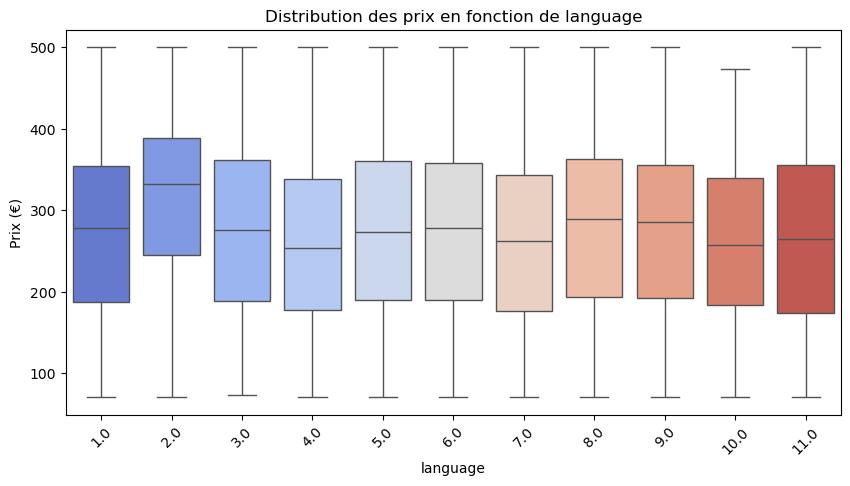

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


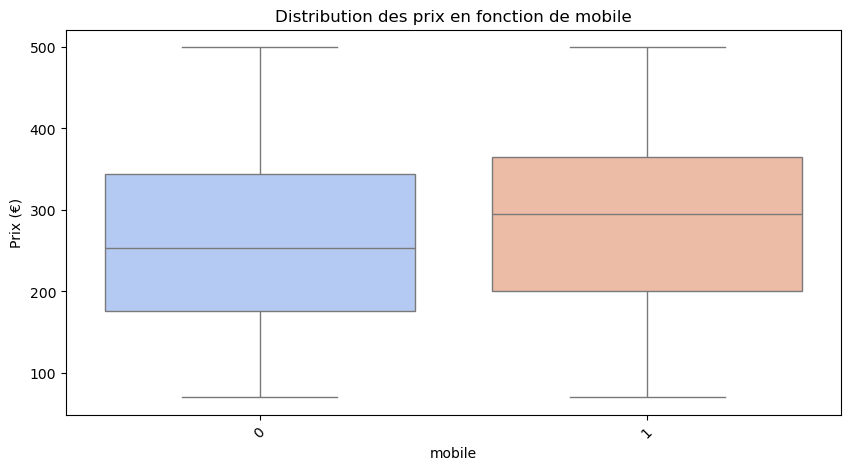

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


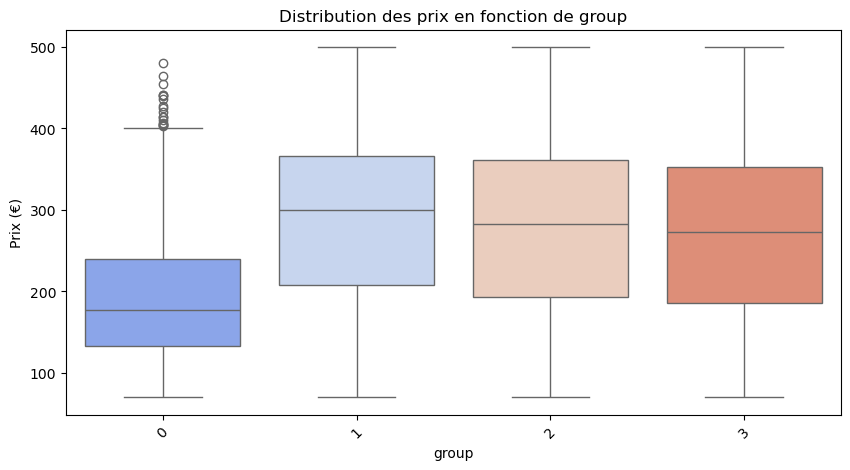

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


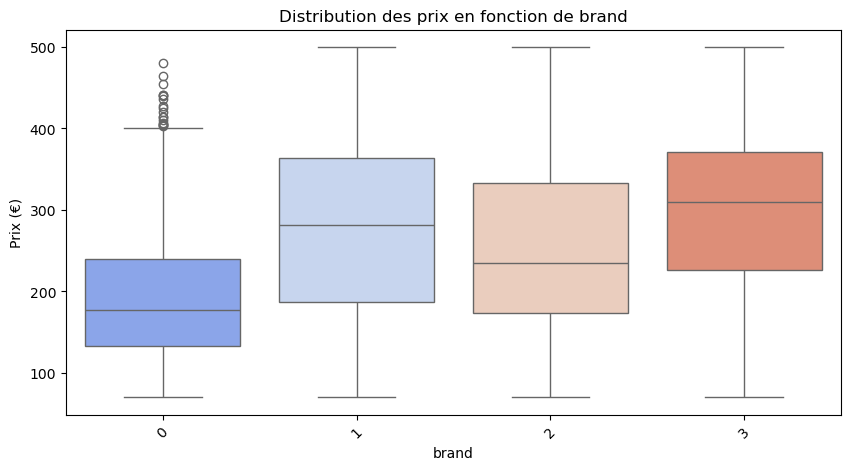

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


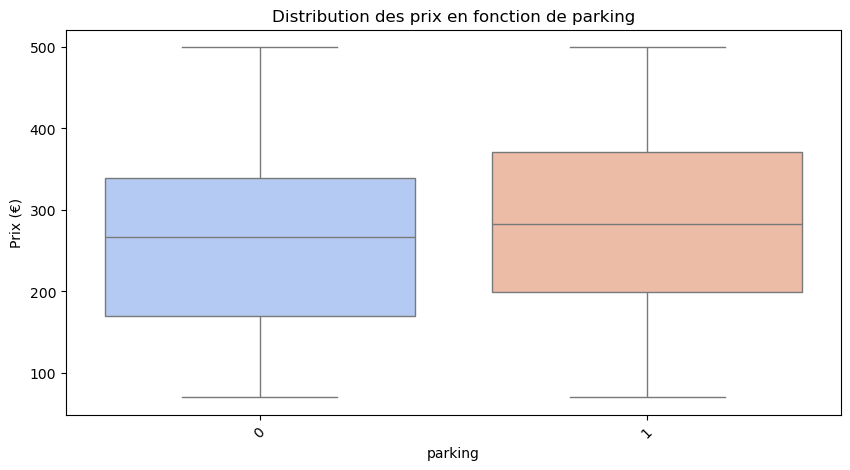

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


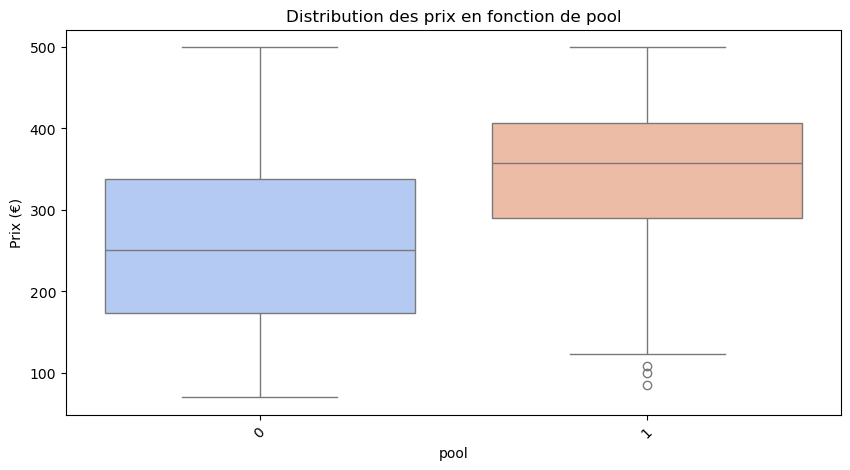

C:\Users\oba3994\AppData\Local\Temp\ipykernel_15492\1862999865.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")


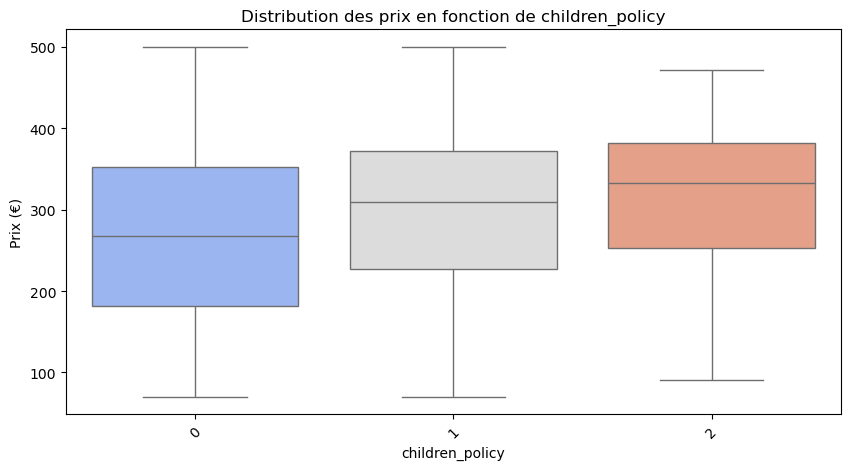

In [38]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_synthetic

# Liste des variables cat√©gorielles
categorical_vars = ["city_x", "language", "mobile", "group", "brand", "parking", "pool", "children_policy"]

# Effectuer des tests ANOVA pour voir l'impact des variables cat√©gorielles sur le prix
anova_results = {}
for var in categorical_vars:
    groups = [df["price"][df[var] == level] for level in df[var].unique()]
    anova_results[var] = stats.f_oneway(*groups)

# Afficher les r√©sultats des tests ANOVA
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['F-statistic', 'p-value'])
anova_df.sort_values(by='p-value', inplace=True)

print("R√©sultats des tests ANOVA :")
print(anova_df)

# Visualisation de l'impact des variables cat√©gorielles sur le prix
for var in categorical_vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[var], y=df["price"], palette="coolwarm")
    plt.title(f"Distribution des prix en fonction de {var}")
    plt.xlabel(var)
    plt.ylabel("Prix (‚Ç¨)")
    plt.xticks(rotation=45)
    plt.show()

# üìä Analyse des r√©sultats des tests ANOVA sur les variables cat√©gorielles

L'ANOVA a √©t√© r√©alis√©e pour √©valuer l'impact des variables cat√©gorielles sur le **prix des h√¥tels**. Voici une analyse des r√©sultats :

## üîç Interpr√©tation des valeurs F-statistic et p-value
- **F-statistic** : Plus elle est √©lev√©e, plus la variable a un effet important sur la variation du prix.
- **p-value** : Si elle est inf√©rieure √† **0.05**, l'effet de la variable est significatif.

| Variable          | F-statistic | p-value | Influence sur le prix |
|------------------|------------|-----------------|------------------|
| **Piscine (pool)**  | **824.92** | **4.16e-171** | Tr√®s forte influence |
| **Marque (brand)** | **264.45** | **3.91e-162** | Tr√®s forte influence |
| **Groupe (group)** | **203.70** | **2.14e-126** | Forte influence |
| **Parking**       | **118.14** | **2.73e-27**  | Influence mod√©r√©e |
| **Ville (city_x)** | **18.08** | **5.14e-27**  | Influence mod√©r√©e |
| **Mobile**        | **85.69** | **2.77e-20**  | Influence faible |
| **Politique enfants (children_policy)** | **39.50** | **8.81e-18** | Influence faible |
| **Langue (language)** | **5.82** | **8.62e-09** | Influence tr√®s faible |

## üéØ Principales conclusions
1. **Les √©quipements influencent fortement les prix** :
   - **Piscine et Parking** : Les h√¥tels avec une piscine ont un prix nettement plus √©lev√©. Le parking a √©galement un effet, mais moins prononc√©.
   
2. **L‚Äôimage de marque joue un r√¥le cl√©** :
   - **Les marques et les groupes h√¥teliers influencent fortement les prix**. Certains groupes/marques haut de gamme proposent des prix plus √©lev√©s.

3. **La ville a un effet mod√©r√©** :
   - Certaines villes peuvent avoir des prix moyens plus √©lev√©s, mais ce n‚Äôest pas la variable la plus influente.

4. **Autres facteurs avec une influence plus faible** :
   - **R√©servation via mobile** : L‚Äôimpact est faible, mais une diff√©rence existe.
   - **Politique enfants** : Peu d‚Äôimpact significatif sur le prix.
   - **Langue** : Impact tr√®s faible, sugg√©rant que la langue du client n'affecte pas significativement les prix.

üîç Ces r√©sultats permettent de mieux comprendre **les facteurs qui influencent le prix des h√¥tels**, aidant ainsi √† affiner la strat√©gie de mod√©lisation. üöÄ

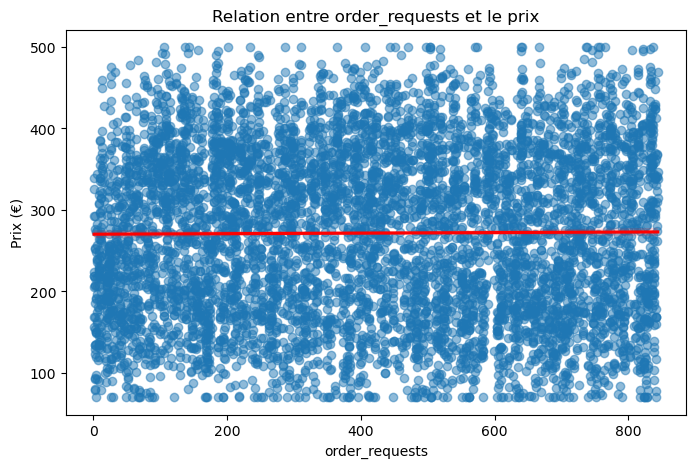

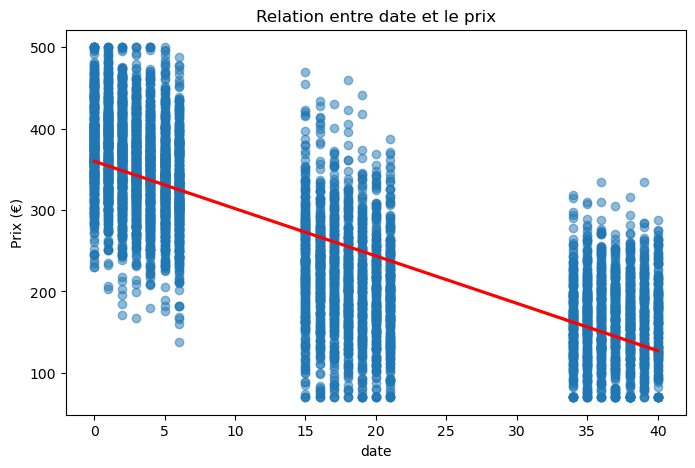

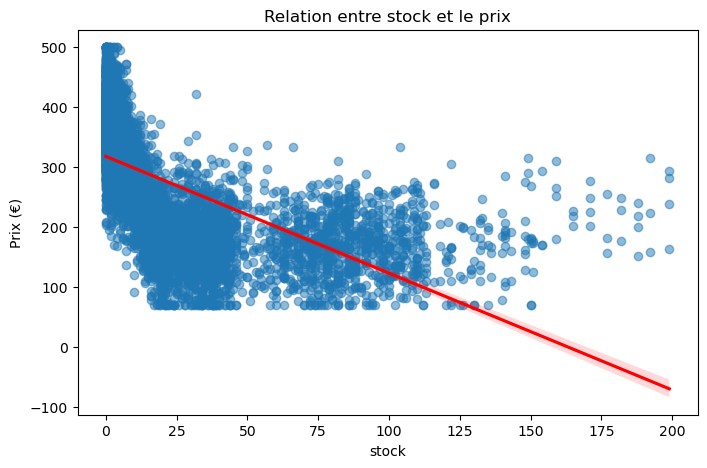

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cr√©ation des graphiques de dispersion avec r√©gression
continuous_vars = ['order_requests', 'date', 'stock']

df_merged = df_synthetic

for var in continuous_vars:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=df_merged[var], y=df_merged['price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Relation entre {var} et le prix")
    plt.xlabel(var)
    plt.ylabel("Prix (‚Ç¨)")
    plt.show()

In [40]:
# Tests de corr√©lation de Pearson
correlation_results = {}
for var in continuous_vars:
    corr, p_value = stats.pearsonr(df_merged[var], df_merged['price'])
    correlation_results[var] = {"corr√©lation": corr, "p-value": p_value}

# Affichage des r√©sultats
import pandas as pd
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index')
correlation_df.head()

corr√©lation  p-value
order_requests     0.007976   0.5157
date              -0.777955   0.0000
stock             -0.616126   0.0000

# üìä **Analyse des R√©sultats de la Corr√©lation entre les Variables Continues et le Prix des H√¥tels**  

| Variable          | Corr√©lation | p-value  | Interpr√©tation |
|------------------|-------------|----------|--------------------------------------------------------------|
| **order_requests** | 0.0079       | 0.5157   | Pas de corr√©lation significative avec le prix (p > 0.05). |
| **date**          | -0.7779      | 0.0000   | Corr√©lation n√©gative forte : plus la date de r√©servation est proche, plus le prix est bas. |
| **stock**         | -0.6161      | 0.0000   | Corr√©lation n√©gative mod√©r√©e : plus il y a de chambres disponibles, plus le prix est bas. |

---

## üßê **Interpr√©tation d√©taill√©e :**  

### 1Ô∏è‚É£ `order_requests` (Nombre de demandes de r√©servation)
- **Corr√©lation tr√®s faible (0.0079)** et **p-value √©lev√©e (0.5157)**.
- Aucune relation significative avec le prix des h√¥tels.
- **Conclusion :** Cette variable **n‚Äôimpacte pas** la tarification.

### 2Ô∏è‚É£ `date` (Jours avant la r√©servation)
- **Corr√©lation n√©gative forte (-0.7779)** et **p-value tr√®s faible (0.0000)**.
- Plus un client **r√©serve tard**, plus le prix **diminue**.
- Strat√©gie typique des h√¥tels qui baissent les prix √† la derni√®re minute pour maximiser leur taux d'occupation.
- **Conclusion :** Variable cl√© dans la tarification dynamique.

### 3Ô∏è‚É£ `stock` (Nombre de chambres disponibles)
- **Corr√©lation n√©gative mod√©r√©e (-0.6161)** et **p-value tr√®s faible (0.0000)**.
- Plus il y a de chambres disponibles, plus le prix diminue.
- Cela refl√®te une politique de tarification bas√©e sur l'offre et la demande.
- **Conclusion :** Variable importante dans la pr√©vision des prix.

---

## üîç **Conclusions et Implications :**  
‚úÖ **Les strat√©gies de tarification dynamique sont √©videntes** : les h√¥tels ajustent les prix selon la disponibilit√© et le moment de la r√©servation.  
‚úÖ **Le stock et la date de r√©servation influencent fortement le prix**, alors que le nombre de demandes de r√©servation (`order_requests`) n‚Äôa pas d‚Äôeffet notable.  
‚úÖ **Une approche de pr√©diction des prix devra inclure `date` et `stock` comme variables cl√©s**, tandis que `order_requests` pourrait √™tre ignor√©e ou analys√©e plus en profondeur.

In [ ]:
# üî• 2. Mod√®le Random Forest pour importance des variables
X = df.drop(columns=['price'])  # Variables explicatives
y = df['price']  # Variable cible

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Importance des features
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# üìä Affichage de l'importance des features
plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="Blues_r")
plt.title("Importance des Variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 1. Identifier et visualiser les prix extr√™mes pour une √©ventuelle correction ou transformation des donn√©es !

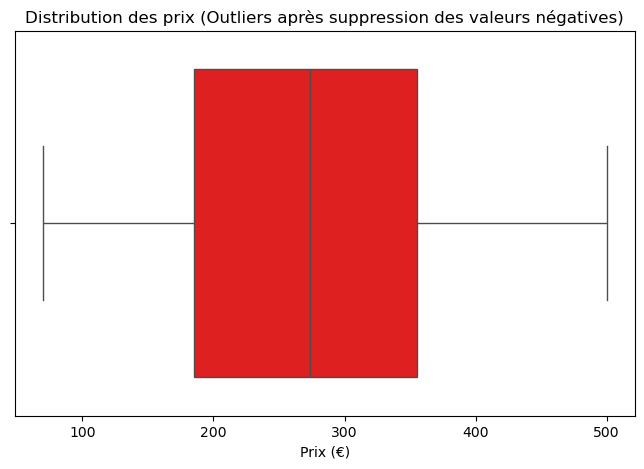

üîç Nombre total d'outliers d√©tect√©s : 0
üìâ Seuil inf√©rieur : -70.59 ‚Ç¨
üìà Seuil sup√©rieur : 610.84 ‚Ç¨


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# V√©rification des outliers avec un boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_synthetic_pricing_data["price"], color="red")
plt.title("Distribution des prix (Outliers apr√®s suppression des valeurs n√©gatives)")
plt.xlabel("Prix (‚Ç¨)")
plt.show()

# D√©tection des outliers avec la m√©thode IQR
Q1 = df_synthetic_pricing_data["price"].quantile(0.25)
Q3 = df_synthetic_pricing_data["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_synthetic_pricing_data[(df_synthetic_pricing_data["price"] < lower_bound) | 
                                     (df_synthetic_pricing_data["price"] > upper_bound)]

# Affichage des r√©sultats
print(f"üîç Nombre total d'outliers d√©tect√©s : {outliers.shape[0]}")
print(f"üìâ Seuil inf√©rieur : {lower_bound:.2f} ‚Ç¨")
print(f"üìà Seuil sup√©rieur : {upper_bound:.2f} ‚Ç¨")

### üìä Analyse de la distribution des prix  

Le boxplot montre une r√©partition coh√©rente des prix des h√¥tels, avec une m√©diane autour de **200-300 ‚Ç¨**, conforme √† l'objectif fix√©. La majorit√© des prix se situent entre **100 ‚Ç¨ et 500 ‚Ç¨**, sans valeurs aberrantes d√©tect√©es. Cette distribution refl√®te bien l‚Äôimpact des facteurs influen√ßant les prix, comme la disponibilit√© des chambres, la pr√©sence d‚Äô√©quipements (**parking, piscine**) et l‚Äôappartenance √† une marque. ‚úÖ

## 2. Pr√©parer les donn√©es pour l'entra√Ænement : S√©parer les donn√©es en train/test

In [30]:
from sklearn.model_selection import train_test_split

# D√©finir les features (X) et la variable cible (y)
X = df_synthetic_pricing_data.drop(columns=["index", "price", "hotel_id", "avatar_id"])  # Supprimer les identifiants inutiles
y = df_synthetic_pricing_data["price"]

# Division en jeu d'entra√Ænement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# V√©rifier la taille des ensembles
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5315, 12), (1329, 12), (5315,), (1329,))

## 3. Entra√Æner plusieurs mod√®les de Machine Learning

In [31]:
# Import des mod√®les
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialiser les mod√®les
models = {
    "R√©gression Lin√©aire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
}

# Dictionnaire pour stocker les r√©sultats
results = {}

# Entra√Ænement et √©valuation de chaque mod√®le
for name, model in models.items():
    print(f"üîÑ Entra√Ænement du mod√®le : {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse

# Afficher les r√©sultats des mod√®les
results

üîÑ Entra√Ænement du mod√®le : R√©gression Lin√©aire...
üîÑ Entra√Ænement du mod√®le : Random Forest...
üîÑ Entra√Ænement du mod√®le : XGBoost...


{'R√©gression Lin√©aire': 62.90582838253569,
 'Random Forest': 55.37133228992034,
 'XGBoost': 56.15089453531057}

## 4. Optimiser les hyperparam√®tres avec GridSearchCV

In [32]:
from sklearn.model_selection import GridSearchCV

# Hyperparam√®tres pour Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_rf.fit(X_train, y_train)

print(f"‚úÖ Meilleurs param√®tres pour Random Forest : {grid_rf.best_params_}")
print(f"üèÜ Meilleur RMSE : {-grid_rf.best_score_}")

# Hyperparam√®tres pour XGBoost
param_grid_xgb = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 6, 10]
}

grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=3, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print(f"‚úÖ Meilleurs param√®tres pour XGBoost : {grid_xgb.best_params_}")
print(f"üèÜ Meilleur RMSE : {-grid_xgb.best_score_}")

‚úÖ Meilleurs param√®tres pour Random Forest : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
üèÜ Meilleur RMSE : 50.69765850104975
‚úÖ Meilleurs param√®tres pour XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
üèÜ Meilleur RMSE : 49.143262785105684


## 5. Visualiser les r√©sultats

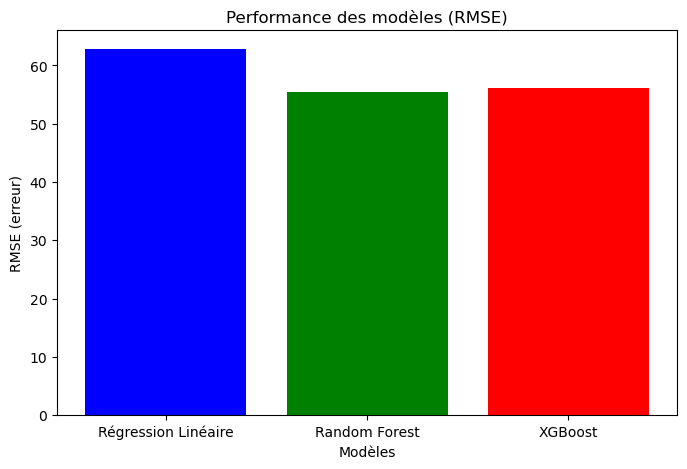

In [33]:
import matplotlib.pyplot as plt

# Afficher les performances des mod√®les
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "red"])
plt.title("Performance des mod√®les (RMSE)")
plt.xlabel("Mod√®les")
plt.ylabel("RMSE (erreur)")
plt.show()

## 6. sauvegardons le meilleur mod√®le dans le dossier backend/model

In [34]:
import joblib
import os

# Cr√©er le dossier s'il n'existe pas
model_dir = "backend/model"
os.makedirs(model_dir, exist_ok=True)

# S√©lectionner le meilleur mod√®le en fonction du RMSE
best_model_name = min(results, key=results.get)  # Mod√®le avec le plus petit RMSE
best_model = models[best_model_name]

# D√©finir le chemin de sauvegarde du mod√®le
model_filename = f"{best_model_name.replace(' ', '_').lower()}_model.pkl"
model_path = os.path.join(model_dir, model_filename)

# Sauvegarder le mod√®le
joblib.dump(best_model, model_path)

print(f"‚úÖ Le mod√®le '{best_model_name}' a √©t√© sauvegard√© sous : {model_path}")

‚úÖ Le mod√®le 'Random Forest' a √©t√© sauvegard√© sous : backend/model\random_forest_model.pkl
